In [176]:
# Data Analysis Summary: 

# Key insights include average selling prices and present prices, percentage comparisons of prices, as well as full holistic
# view of market state with average conditions of cars in database, lifespan (ie. year they were made in) etc.

# While average selling prices, percentage comparisons of prices, and a holistic view of any market data are essential 
# for understanding current conditions and trends, it is equally important to address specific factors that affect individual 
# car listings. These include but are not limited to mileage, # of owners, fuel type, model preferences and much more. To offer
# a complete and comprehensive analysis, all possible instances of these are included in the project and presented through 
# dataframes. 

# Key analysis built on the use of dataframes and filtration techniques to better capture outliers in the data provided, 
# enhancing the ability to make conclusions for users. 

# Notes and Regards: 

# Dataset was provided open source through Kaggle via 
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download

# Dataset can code can also be altered for further use and modelling such as price prediction through a linear regression  
# models serving to provide both useful takeaways for customers and sellers if utilized in a real setting. 

# Credits: 
# Developed and built by Masood Ashrafi 
# Github Link: https://github.com/masoodashrafi
# Linkedin Link: www.linkedin.com/in/masood-ashrafi

# * 2nd Year Student - University of Waterloo CS and Wilfrid Laurier BBA *

In [192]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Show plots 
%matplotlib inline 

# Create paths to csv files
car_data_path = "raw_data/car_data.csv"
details_dekho_path = "raw_data/details_dekho.csv"
detailsv3_path = "raw_data/car_detailsv3.csv"
detailsv4_path = "raw_data/car_detailsv4.csv"


# Read the csv files
cars = pd.read_csv(car_data_path)
cars = pd.DataFrame(cars)
# cars = cars.rename(columns={"name": "school"}) # if we end up trying to merge later

details = pd.read_csv(details_dekho_path)
details = pd.DataFrame(details)

detailsv3 = pd.read_csv(detailsv3_path)
detailsv3 = pd.DataFrame(detailsv3)

detailsv4 = pd.read_csv(detailsv4_path)
detailsv4 = pd.DataFrame(detailsv4)

In [178]:
# Examining cars data

cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [179]:
# Analysis for Cars DataBase 

# Calculating total and sums for cars database 
total_cars = cars['Car_Name'].count()
total_year = cars['Year'].sum()
total_selling_price = cars['Selling_Price'].sum()
total_present_price = cars['Present_Price'].sum()
total_kmsdriven = cars['Kms_Driven'].sum()

# Calculating average year for car sale and average price 
avg_year = cars['Year'].mean()
avg_selling_price = cars['Selling_Price'].mean()
avg_present_price = cars['Present_Price'].mean()
avg_kmsdriven = cars['Kms_Driven'].mean()

# Calculating price percentages in comparison to averages 
pass_sellingprice = cars.loc[cars['Selling_Price'] >= avg_selling_price]
per_sellingprice = len(pass_sellingprice)/ total_cars * 100

pass_presentprice = cars.loc[cars['Present_Price'] >= avg_present_price]
per_presentprice = len(pass_presentprice)/ total_cars * 100  

gross_total = (per_sellingprice + per_presentprice)/2 

# Creating the dataframe for summary of insights 
cars_summary = pd.DataFrame({"Total Cars": total_cars,
                            "Total Selling Price": total_selling_price,
                            "Total Present Price": total_present_price,
                            "Total Kilometers": total_kmsdriven,
                            "Average Year": avg_year,
                            "Average Selling Price": avg_selling_price, 
                            "Average Present Price": avg_present_price, 
                            "Average KMs Driven": avg_kmsdriven,
                            "% Passing Selling Price": per_sellingprice,
                            "% Passing Present Price": per_presentprice,
                            "% Total Passing Rate": [gross_total]})

# Format the Average Present Price column to "$0,000.00"
cars_summary['Average Present Price'] = cars_summary['Average Present Price'].map('${:,.2f}'.format)

# Format the Average Selling Price column to "$0,000.00"
cars_summary['Average Selling Price'] = cars_summary['Average Selling Price'].map('${:,.2f}'.format)

# Format the Total Selling Price column to "$0,000.00"
cars_summary['Total Selling Price'] = cars_summary['Total Selling Price'].map('${:,.2f}'.format)

# Format the Total Present Price column to "$0,000.00"
cars_summary['Total Present Price'] = cars_summary['Total Present Price'].map('${:,.2f}'.format)

# Round the % results 
cars_summary['% Passing Selling Price'] = cars_summary['% Passing Selling Price'].round(1)
cars_summary['% Passing Present Price'] = cars_summary['% Passing Present Price'].round(1)
cars_summary['% Total Passing Rate'] = cars_summary['% Total Passing Rate'].round(1)

# Round the average year 
cars_summary['Average Year'] = cars_summary['Average Year'].round()

# Round the average KMs 
cars_summary['Average KMs Driven'] = cars_summary['Average KMs Driven'].round()


cars_summary

,Total Cars,Total Selling Price,Total Present Price,Total Kilometers,Average Year,Average Selling Price,Average Present Price,Average KMs Driven,% Passing Selling Price,% Passing Present Price,% Total Passing Rate
0,301,"$1,403.05","$2,296.17",11121109,2014.0,$4.66,$7.63,36947.0,40.2,39.2,39.7


In [180]:
# Examining details data

details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [181]:
# Analysis for Details DataBase 

# Calculating totals and sums for details 
dtotal_cars = details['name'].count()
dtotal_year = details['year'].sum()
dtotal_selling_price = details['selling_price'].sum()
dtotal_kmsdriven = details['km_driven'].sum()

# Calculating average year for car sale and average price 
davg_year = details['year'].mean()
davg_selling_price = details['selling_price'].mean().round()
davg_kmsdriven = details['km_driven'].mean().round()

# Creating the dataframe for summary of insights 
details_summary = pd.DataFrame({"Total Cars": dtotal_cars,
                            "Total Selling Price": dtotal_selling_price,
                            "Total Kilometers": dtotal_kmsdriven,
                            "Average Year": davg_year,
                            "Average Selling Price": davg_selling_price, 
                            "Average KMs Driven": davg_kmsdriven}, index=[0])

# Format the Average Selling Price column to "$0,000.00"
details_summary['Average Selling Price'] = details_summary['Average Selling Price'].map('${:,.2f}'.format)


# Format the Total Selling Price column to "$0,000.00"
details_summary['Total Selling Price'] = details_summary['Total Selling Price'].map('${:,.2f}'.format)

# Round the average year 
details_summary['Average Year'] = details_summary['Average Year'].round()

# Round the average KMs 
details_summary['Average KMs Driven'] = details_summary['Average KMs Driven'].round()

details_summary

,Total Cars,Total Selling Price,Total Kilometers,Average Year,Average Selling Price,Average KMs Driven
0,4340,"$2,187,912,533.00",287376474,2013.0,"$504,127.00",66216.0


In [182]:
# Detailed analysis for the details dataset 

# Filtering based on those that are above the average selling price 
above_avg_selling_price_mask = details['selling_price'] > davg_selling_price 
dcars_above_avg = details[above_avg_selling_price_mask]
dcount_above_avg = dcars_above_avg['name'].count()
dcount_above_avg_percentage = ((dcount_above_avg/dtotal_cars) * 100).round(1)

# Filtering based on those that are below the average selling price 
below_avg_selling_price_mask = details['selling_price'] < davg_selling_price 
dcars_below_avg = details[below_avg_selling_price_mask]
dcount_below_avg = dcars_below_avg['name'].count()
dcount_below_avg_percentage = ((dcount_below_avg/dtotal_cars) * 100).round(1)

# Filtering based on the average KMs driven (above and below)
above_avgkms = details['km_driven'] > davg_kmsdriven
dcars_above_avgkms = details[above_avgkms]
dcount_above_avgkms = dcars_above_avgkms['name'].count()
dcount_above_avgkms_percentage = ((dcount_above_avgkms/dtotal_cars) * 100).round(1)

below_avgkms = details['km_driven'] < davg_kmsdriven 
dcars_below_avgkms = details[below_avgkms]
dcount_below_avgkms = dcars_below_avgkms['name'].count()
dcount_below_avgkms_percentage = ((dcount_below_avgkms/dtotal_cars) * 100).round(1)

# Filtering based on fuel type 'Petrol'
cars_petrol = details[details['fuel'] == 'Petrol']
total_cars_petrol = len(cars_petrol)

# Filtering based on fuel type 'Diesel'
cars_diesel = details[details['fuel'] == 'Diesel']
total_cars_diesel = len(cars_diesel)

# Filtering based on fuel type 'CNG'
cars_cng = details[details['fuel'] == 'CNG']
total_cars_cng = len(cars_cng)

# Filtering based on fuel type 'LPG'
cars_lpg = details[details['fuel'] == 'LPG']
total_cars_lpg = len(cars_lpg)

# Filtering based on fuel type 'other'
other_fuel_mask = ~details['fuel'].isin(['Diesel', 'Petrol', 'CNG', 'LPG'])

# Filter the DataFrame for the fuel type 'other'
other_fuel_cars = details[other_fuel_mask]

# Get the total number of cars with an 'other' fuel type
total_other_fuel_cars = len(other_fuel_cars)

# Filtering based on seller type (Trustmark, Individual, Dealer) 
dealer = details[details['seller_type'] == 'Dealer']
total_cars_dealer = len(dealer)
individual = details[details['seller_type'] == 'Individual']
total_cars_individual = len(individual)
trustmark = details[details['seller_type'] == 'Trustmark Dealer']
total_cars_trustmark = len(trustmark)
other_seller_mask = ~details['seller_type'].isin(['Dealer', 'Individual', 'Trustmark Dealer'])
other_seller_cars = details[other_seller_mask]
total_other_seller_cars = len(other_seller_cars)

# Filtering based on transmission (Automatic, Manual)
manual = details[details['transmission'] == 'Manual']
total_cars_manual = len(manual)
automatic = details[details['transmission'] == 'Automatic']
total_cars_automatic = len(automatic)

# Filtering based on owner 
first_owner = details[details['owner'] == 'First Owner']
total_first_owner = len(first_owner)
second_owner = details[details['owner'] == 'Second Owner']
total_second_owner = len(second_owner)
third_owner = details[details['owner'] == 'Third Owner']
total_third_owner = len(third_owner)
fourth_above_owner = details[details['owner'] == 'Fourth & Above Owner']
total_fourth_above_owner = len(fourth_above_owner)

# * Dataframes created in next few cells *

In [183]:
# Above average price mask 

above_avg_selling_price_mask

0       False
1       False
2        True
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338     True
4339    False
Name: selling_price, Length: 4340, dtype: bool

In [184]:
# Below average price mask 

below_avg_selling_price_mask 

0        True
1        True
2       False
3        True
4        True
        ...  
4335     True
4336     True
4337     True
4338    False
4339     True
Name: selling_price, Length: 4340, dtype: bool

In [185]:
# Creating the dataframe for filtering based on price for the details dataset 
dprice_summary = pd.DataFrame({"Total Cars": dtotal_cars,
                            "Average Selling Price": davg_selling_price,
                            "Cars Above Average Price": dcount_above_avg,
                            "Cars Below Average Price": dcount_below_avg,
                            "% of Cars Above Average Price": dcount_above_avg_percentage,
                            "% of Cars Below Average Price": dcount_below_avg_percentage, 
                            "Average KMs Driven": davg_kmsdriven, 
                            "Cars Above Avg KMs": dcount_above_avgkms,
                            "Cars Below Avg KMs": dcount_below_avgkms,
                            "% of Cars Above Avg KMs": dcount_above_avgkms_percentage,
                            "% of Cars Below Avg KMs": dcount_below_avgkms_percentage}, index=[0])

dprice_summary

,Total Cars,Average Selling Price,Cars Above Average Price,Cars Below Average Price,% of Cars Above Average Price,% of Cars Below Average Price,Average KMs Driven,Cars Above Avg KMs,Cars Below Avg KMs,% of Cars Above Avg KMs,% of Cars Below Avg KMs
0,4340,504127.0,1461,2879,33.7,66.3,66216.0,1895,2445,43.7,56.3


In [186]:
# Creating the dataframe for more filtered categories (ie. fuel type, seller type) 
dfilter_summary = pd.DataFrame({"Total Cars": dtotal_cars,
                            "Cars on Petro": total_cars_petrol,
                            "Cars on Diesel": total_cars_diesel,
                            "Cars on CNG": total_cars_cng,
                            "Cars on LPG": total_cars_lpg,
                            "Cars on other fuel": total_other_fuel_cars, 
                            "Cars sold by a Individual": total_cars_individual, 
                            "Cars sold by a Dealer": total_cars_dealer,
                            "Cars sold by a Trustmark": total_cars_trustmark,
                            "Cars sold by another seller":total_other_seller_cars}, index=[0])
dfilter_summary

,Total Cars,Cars on Petro,Cars on Diesel,Cars on CNG,Cars on LPG,Cars on other fuel,Cars sold by a Individual,Cars sold by a Dealer,Cars sold by a Trustmark,Cars sold by another seller
0,4340,2123,2153,40,23,1,3244,994,102,0


In [187]:
# Creating the dataframe for filtering based on transmission 
dfilter_transmission = pd.DataFrame({"Total Cars": dtotal_cars,
                            "Manual Cars": total_cars_manual, 
                            "Automatic Cars": total_cars_automatic}, index=[0])

dfilter_transmission

,Total Cars,Manual Cars,Automatic Cars
0,4340,3892,448


(-1.0999981535432892,
 1.0999999114213985,
 -1.0999979079263937,
 1.099994753466594)

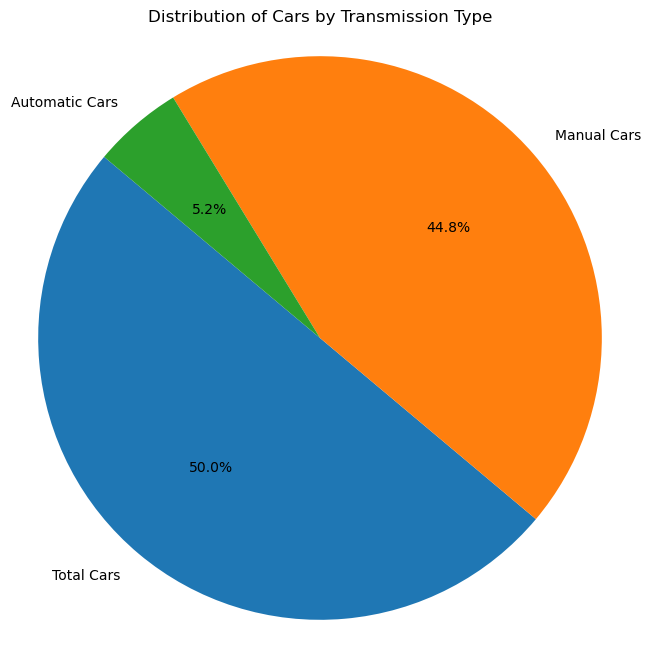

In [188]:
# Extract first row as a series
firstrow = dfilter_transmission.iloc[0]  # Get the first row of the DataFrame as a Series

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(firstrow, labels=firstrow.index, autopct='%1.1f%%', startangle=140)

plt.title("Distribution of Cars by Transmission Type") # Plot title

plt.axis('equal') # Make sure it's drawn as a circle 

Text(0.5, 1.0, 'Number of Cars by Transmission Type')

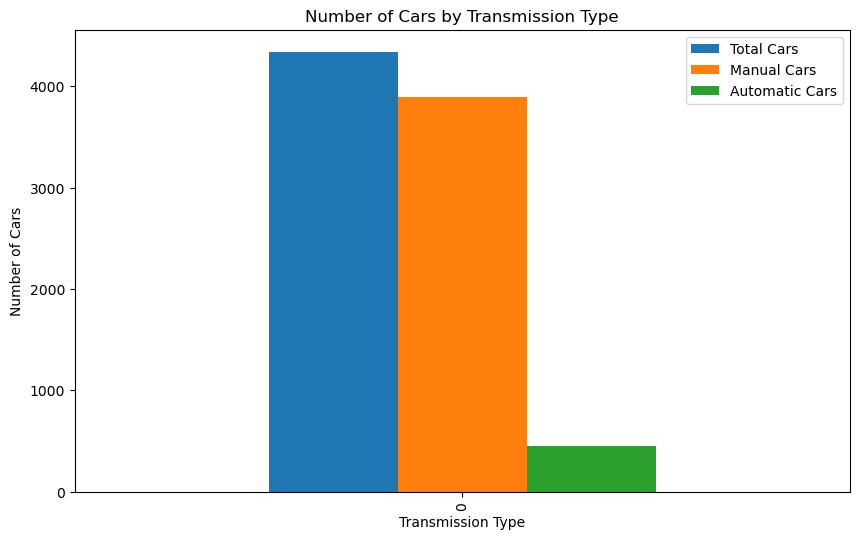

In [189]:
# Bar plot representation for filtering based on transmission
dfilter_transmission.plot(kind='bar', figsize=(10, 6))

# Add labels and a title
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Transmission Type")

In [190]:
# Creating the dataframe for filtering based on # of owners
dfilter_owners = pd.DataFrame({"Total Cars": dtotal_cars,
                            "First Owners": total_first_owner, 
                            "Second Owners": total_second_owner,
                            "Third Owners": total_third_owner,
                            "Fourth & Above Owner": total_fourth_above_owner}, index=[0])

dfilter_owners

,Total Cars,First Owners,Second Owners,Third Owners,Fourth & Above Owner
0,4340,2832,1106,304,81


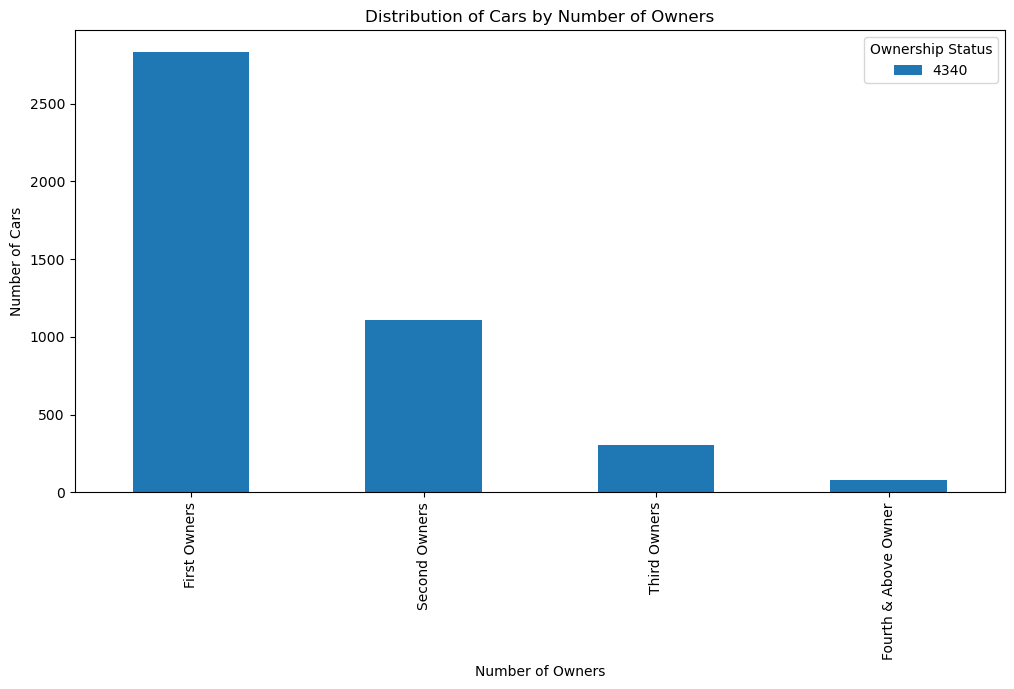

In [191]:
# Stacked Bar plot representation for filtering based on # of owners
dfilter_owners.set_index("Total Cars").T.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add legend, labels and a title
plt.xlabel("Number of Owners")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars by Number of Owners")
plt.legend(title="Ownership Status")